In [186]:
import pandas as pd
import numpy as np
import re
import datetime
import category_encoders as ce
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [187]:
wine_df = pd.read_csv('data/wine_cleared.csv')

In [188]:
wine_df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [189]:
wine_df['price_round'] = wine_df['price'].round().astype(int)
wine_df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15


In [190]:
regex = '\d{4}'
wine_df['year'] = wine_df['title'].str.findall(regex).str.get(0)
wine_df.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013


In [191]:
wine_df['is_usa'] = wine_df['country'].apply(lambda x: 1 if x == 'US' else 0)

In [192]:
# Выберите из списка две самых популярных (помимо США) страны, производящих вино.
wine_df['country'].value_counts().head(3)

country
US        54504
France    22093
Italy     19540
Name: count, dtype: int64

In [193]:
# Создайте бинарные признаки is_france, is_italy наподобие признака is_usa
wine_df['is_france'] = wine_df['country'].apply(lambda x: 1 if x == 'France' else 0)
wine_df['is_italy'] = wine_df['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [194]:
# В ответ впишите результат выполнения кода data['is_france'].sum()
wine_df['is_france'].sum()

22093

In [195]:
# В ответ впишите результат выполнения кода data['is_italy'].sum()
wine_df['is_italy'].sum()

19540

In [196]:
# Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.
wine_df['old_wine'] = wine_df['year'].apply(lambda x: 1 if x is not np.nan and int(x) < 2010 else 0)

In [197]:
# В ответ впишите результат выполнения кода data['old_wine'].sum()
wine_df['old_wine'].sum()

39781

In [198]:
result = re.findall(r'\((.*?)\)', 'Rainstorm 2013 Pinot Gris (Willamette we asdfas adf)')
result

['Willamette we asdfas adf']

In [199]:
regex = '\((.*?)\)'
wine_df['locality'] = wine_df['title'].str.findall(regex).str.get(0)
wine_df


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1,0,0,0,Lake Michigan Shore
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0,Willamette Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0,Erben Müller-Burggraef
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004,1,0,0,1,Oregon
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013,0,1,0,0,Alsace
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012,0,1,0,0,Alsace


In [200]:
country_population = pd.read_csv('data/country_population.csv', sep=';')
country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [201]:
country_population[country_population['country'] == 'Italy']['population']

24    59,097,904
Name: population, dtype: object

In [202]:
wine_df=wine_df.join(country_population.set_index('country'), on='country')

In [203]:
country_area = pd.read_csv('data/country_area.csv', sep=';')

In [204]:
wine_df=wine_df.join(country_area.set_index('country'), on='country')

In [205]:
wine_df[wine_df['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area']

94    9372610.0
Name: area, dtype: float64

In [206]:
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

In [207]:
calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])
calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [208]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [209]:
# Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.

calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66


In [210]:
# В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum()
calls['time_connection'].sum()

89

In [211]:
# Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и 
# продлился больше 10 секунд, иначе — 0.
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)

In [212]:
# В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum()
calls['is_connection'].sum()

7

In [213]:
# Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds

In [214]:
# В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum()
calls['time_diff'].sum()

1144

In [215]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


In [216]:
# Создайте признак количество дней с момента произведения вина — years_diff для 
# датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. 
# В ответ впишите максимальное количество дней с момента произведения вина. 
# Ответ округлите до целого числа.
wine_df['year'] = pd.to_datetime(wine_df['year'], errors='coerce')

In [217]:
wine_df['years_diff'] = (pd.to_datetime('2022-01-12') - wine_df['year']).dt.days

In [218]:
wine_df['years_diff'].max()

98627.0

In [219]:
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [220]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
    'col': 'size',
    'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)
clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [221]:
wine_df = wine_df.sort_values(by=['year'])
wine_df['year'] = wine_df['year'].astype('category')
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(wine_df[['year']])
wine_df = pd.concat([wine_df, data_bin], axis=1)


In [222]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True)
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)
clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


In [223]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,False,True,False,False
1,xxs,1,0,1,0,0,False,False,False,True
2,xs,2,1,0,0,0,False,True,False,False
3,s,3,0,1,0,0,False,False,False,True
4,m,4,1,0,0,0,False,True,False,False
5,l,5,0,0,1,0,False,False,True,False
6,s,3,0,0,0,1,True,False,False,False
7,m,4,0,0,0,1,True,False,False,False
8,xxl,6,0,0,1,0,False,False,True,False
9,l,5,1,0,0,0,False,True,False,False


In [224]:
wine_df = pd.get_dummies(wine_df, columns=['taster_name'], dtype=int)
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_twitter_handle,title,...,taster_name_Lauren Buzzeo,taster_name_Matt Kettmann,taster_name_Michael Schachner,taster_name_Mike DeSimone,taster_name_Paul Gregutt,taster_name_Roger Voss,taster_name_Sean P. Sullivan,taster_name_Susan Kostrzewa,taster_name_Virginie Boone,taster_name_unknown
67141,67141,France,"Classic Provence pale-pink-colored rosé, this ...",Marion,88,20.0,Provence,Côtes de Provence,@vossroger,1752 Signature Wines 2016 Marion Rosé (Côtes d...,...,0,0,0,0,0,1,0,0,0,0
68586,68586,US,"A new effort from winemaker Isabelle Dutartre,...",unknown,91,48.0,Oregon,Chehalem Mountains,@paulgwine,1789 Wines 2007 Pinot Noir (Chehalem Mountains),...,0,0,0,0,1,0,0,0,0,0
113629,113629,Italy,Heady aromas of peach and exotic fruit carry o...,Cuvée 1821 Brut,86,15.0,Veneto,Prosecco,@kerinokeefe,Zonin NV Cuvée 1821 Brut (Prosecco),...,0,0,0,0,0,0,0,0,0,0
42594,42594,Italy,"Easy and bright, this is a great summer sipper...",Cuvèe 1821 Brut,86,15.0,Veneto,Prosecco,unknown,Zonin NV Cuvèe 1821 Brut (Prosecco),...,0,0,0,0,0,0,0,0,0,1
43085,43085,Italy,Vintner Gianni Zonin was instrumental in pushi...,Cuvèe 1821,85,15.0,Veneto,Prosecco,unknown,Zonin NV Cuvèe 1821 (Prosecco),...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129710,129710,US,"Dark and intriguing, this wine offers notes of...",unknown,86,11.0,Virginia,Virginia,unknown,Molliver Vineyards NV Chambourcin (Virginia),...,0,0,0,0,0,0,0,0,0,1
129719,129719,France,In order to maintain freshness and crispness i...,Domaine Vieilles Vignes Brut,90,49.0,Champagne,Champagne,@vossroger,Bruno Gobillard NV Domaine Vieilles Vignes Bru...,...,0,0,0,0,0,1,0,0,0,0
129743,129743,France,"Crisp and fruity, this mature-tasting wine has...",Réserve Brut,90,70.0,Champagne,Champagne,@vossroger,Castelnau NV Réserve Brut (Champagne),...,0,0,0,0,0,1,0,0,0,0
129869,129869,US,"This wine hits the mark, combining intriguing ...",Brut,90,25.0,California,California,@gordone_cellars,Biltmore Estate NV Brut Sparkling (California),...,0,0,0,0,0,0,0,0,0,0


In [225]:
bin_encoder = ce.BinaryEncoder(cols=['type'])
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)
clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [226]:
bin_encoder = ce.BinaryEncoder(cols=['country'])
country_bin_encoding = bin_encoder.fit_transform(wine_df['country'])
wine_df = pd.concat([wine_df, country_bin_encoding], axis=1)
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_twitter_handle,title,...,taster_name_Sean P. Sullivan,taster_name_Susan Kostrzewa,taster_name_Virginie Boone,taster_name_unknown,country_0,country_1,country_2,country_3,country_4,country_5
67141,67141,France,"Classic Provence pale-pink-colored rosé, this ...",Marion,88,20.0,Provence,Côtes de Provence,@vossroger,1752 Signature Wines 2016 Marion Rosé (Côtes d...,...,0,0,0,0,0,0,0,0,0,1
68586,68586,US,"A new effort from winemaker Isabelle Dutartre,...",unknown,91,48.0,Oregon,Chehalem Mountains,@paulgwine,1789 Wines 2007 Pinot Noir (Chehalem Mountains),...,0,0,0,0,0,0,0,0,1,0
113629,113629,Italy,Heady aromas of peach and exotic fruit carry o...,Cuvée 1821 Brut,86,15.0,Veneto,Prosecco,@kerinokeefe,Zonin NV Cuvée 1821 Brut (Prosecco),...,0,0,0,0,0,0,0,0,1,1
42594,42594,Italy,"Easy and bright, this is a great summer sipper...",Cuvèe 1821 Brut,86,15.0,Veneto,Prosecco,unknown,Zonin NV Cuvèe 1821 Brut (Prosecco),...,0,0,0,1,0,0,0,0,1,1
43085,43085,Italy,Vintner Gianni Zonin was instrumental in pushi...,Cuvèe 1821,85,15.0,Veneto,Prosecco,unknown,Zonin NV Cuvèe 1821 (Prosecco),...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129710,129710,US,"Dark and intriguing, this wine offers notes of...",unknown,86,11.0,Virginia,Virginia,unknown,Molliver Vineyards NV Chambourcin (Virginia),...,0,0,0,1,0,0,0,0,1,0
129719,129719,France,In order to maintain freshness and crispness i...,Domaine Vieilles Vignes Brut,90,49.0,Champagne,Champagne,@vossroger,Bruno Gobillard NV Domaine Vieilles Vignes Bru...,...,0,0,0,0,0,0,0,0,0,1
129743,129743,France,"Crisp and fruity, this mature-tasting wine has...",Réserve Brut,90,70.0,Champagne,Champagne,@vossroger,Castelnau NV Réserve Brut (Champagne),...,0,0,0,0,0,0,0,0,0,1
129869,129869,US,"This wine hits the mark, combining intriguing ...",Brut,90,25.0,California,California,@gordone_cellars,Biltmore Estate NV Brut Sparkling (California),...,0,0,0,0,0,0,0,0,1,0


In [227]:
wine_df['taster_twitter_handle'].nunique()

16

In [228]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
bin_encoded_data = bin_encoder.fit_transform(wine_df['taster_twitter_handle'])
wine_df = pd.concat([wine_df, bin_encoded_data], axis=1)
wine_df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_twitter_handle,title,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
67141,67141,France,"Classic Provence pale-pink-colored rosé, this ...",Marion,88,20.0,Provence,Côtes de Provence,@vossroger,1752 Signature Wines 2016 Marion Rosé (Côtes d...,...,0,0,0,0,1,0,0,0,0,1
68586,68586,US,"A new effort from winemaker Isabelle Dutartre,...",unknown,91,48.0,Oregon,Chehalem Mountains,@paulgwine,1789 Wines 2007 Pinot Noir (Chehalem Mountains),...,0,0,0,1,0,0,0,0,1,0
113629,113629,Italy,Heady aromas of peach and exotic fruit carry o...,Cuvée 1821 Brut,86,15.0,Veneto,Prosecco,@kerinokeefe,Zonin NV Cuvée 1821 Brut (Prosecco),...,0,0,0,1,1,0,0,0,1,1


In [229]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [230]:
df_dummies = pd.get_dummies(df, columns=['product', 'payment_type'], dtype=int)
df = pd.concat([df, df_dummies], axis=1)
df

,product,price,payment_type,price,product_Product1,product_Product2,product_Product3,payment_type_Amex,payment_type_Mastercard,payment_type_Visa
0,Product1,1200,Mastercard,1200,1,0,0,0,1,0
1,Product2,3600,Visa,3600,0,1,0,0,0,1
2,Product3,7500,Amex,7500,0,0,1,1,0,0


In [231]:
np.random.seed(34)

df = pd.DataFrame({
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)
df

,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664
...,...,...,...,...
995,50.976583,3.748883,7.057497,9.609427
996,46.290172,1.195512,8.419497,14.972852
997,58.912029,7.014868,11.541732,33.654934
998,52.185621,2.391140,11.819914,6.091417


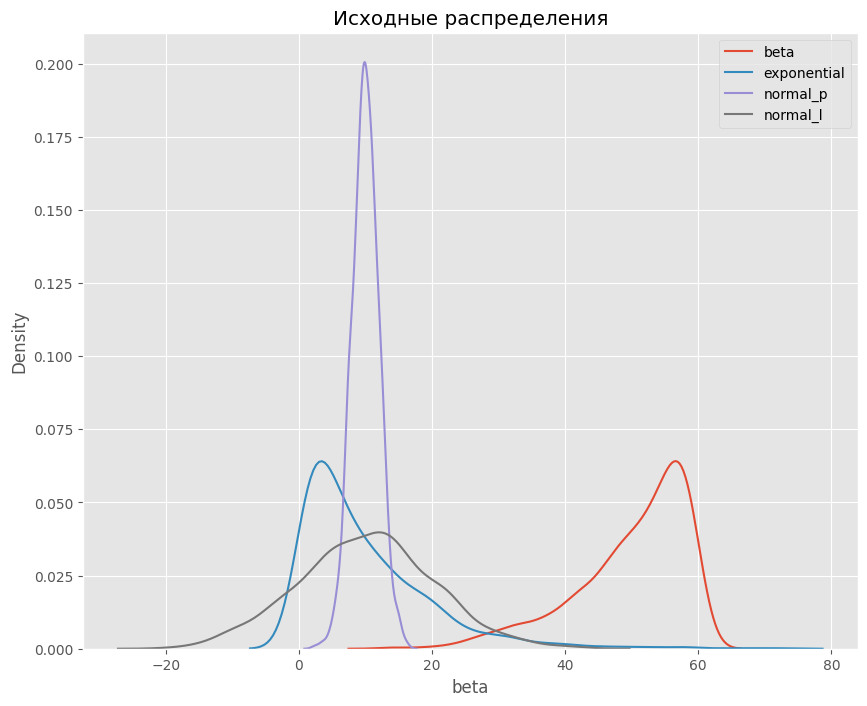

In [232]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

sns.kdeplot(df['beta'], ax=ax1, label = 'beta')
sns.kdeplot(df['exponential'], ax=ax1, label = 'exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label = 'normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label = 'normal_l')
plt.legend()

In [233]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

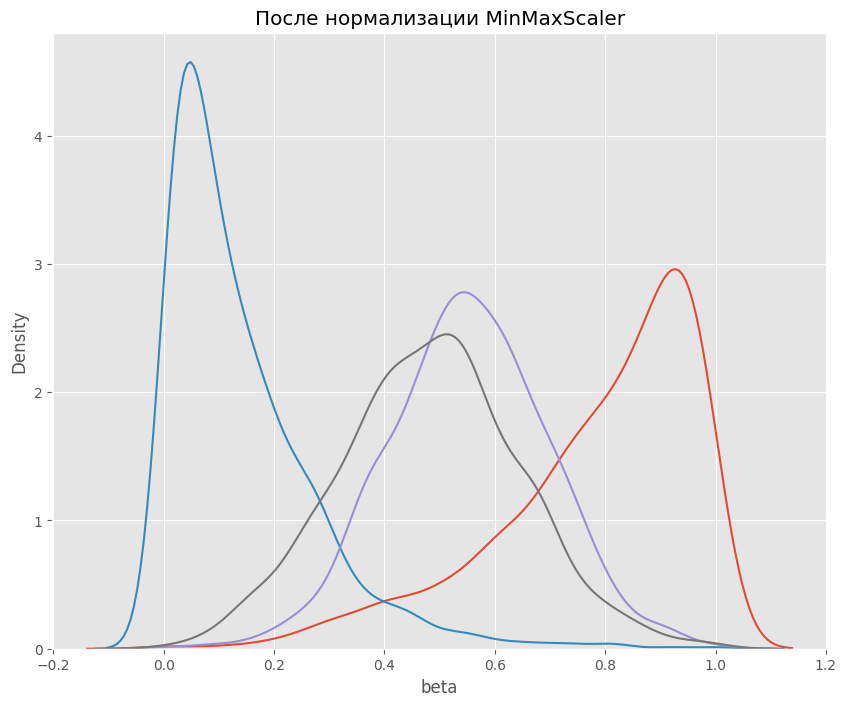

In [234]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)


In [235]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='beta', ylabel='Density'>

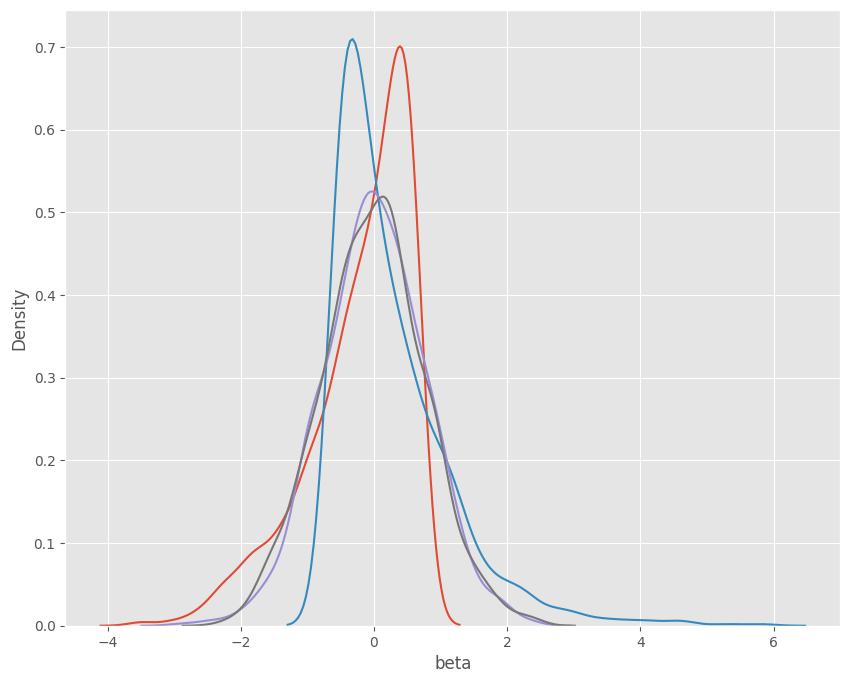

In [236]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

In [237]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

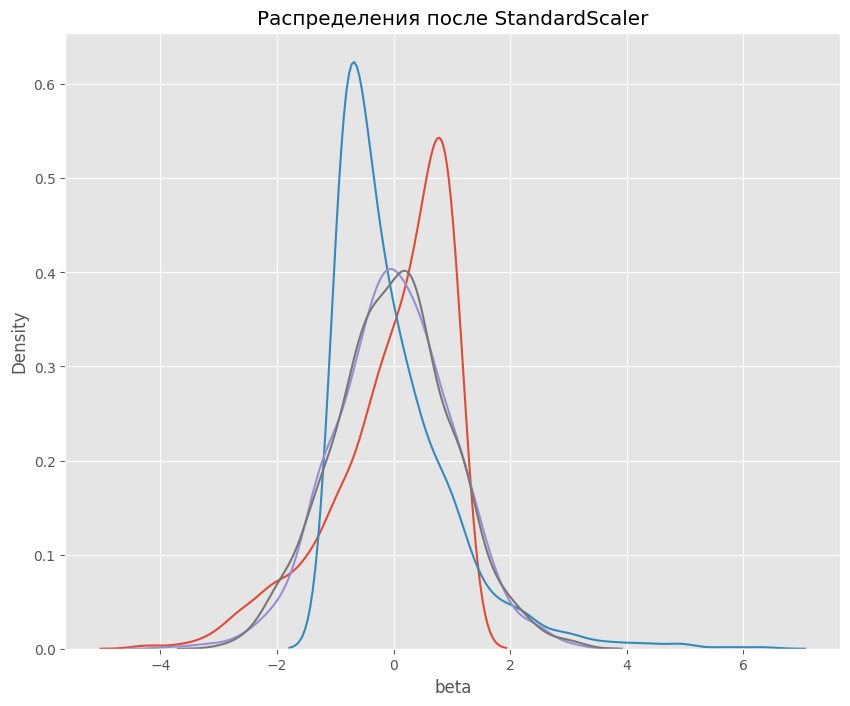

In [238]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)



In [239]:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


<Axes: >

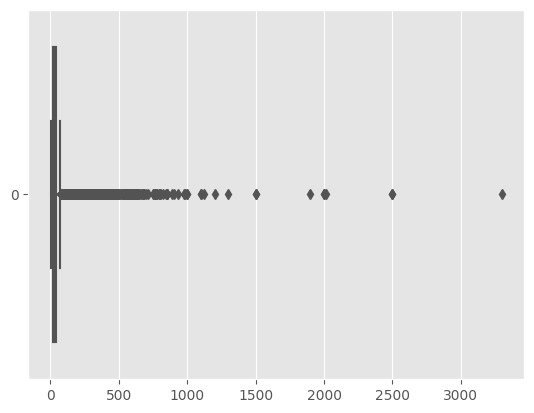

In [240]:
sns.boxplot(wine_df['price'], orient='horizontal')

In [241]:
# Нормализуйте признак price. Выберите подходящий тип нормализации, 
# учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.
wine_price = pd.DataFrame(wine_df['price'])
r_scaler = preprocessing.RobustScaler()
price_norm = r_scaler.fit_transform(wine_price)
price_norm = pd.DataFrame(price_norm, columns=['price_norm'])
price_norm.sum().round()


price_norm    43501.0
dtype: float64

In [242]:
wine_df_new = pd.read_csv('data/wine_cleared.csv')


In [243]:
wine_price = pd.DataFrame(wine_df_new['price'])
price_std = preprocessing.StandardScaler().fit_transform(wine_price)
price_std = pd.DataFrame(price_std, columns=['price_std'])
price_std.iloc[129968].round(2)

price_std   -0.14
Name: 129968, dtype: float64

In [244]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<Axes: >

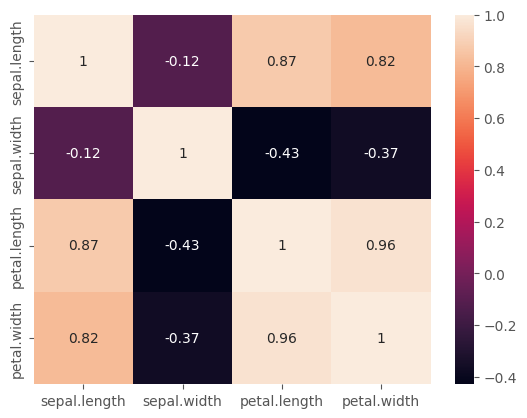

In [245]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

In [246]:
iris = iris.drop(['petal.width'], axis=1)

In [247]:
iris = iris.drop(['petal.length'], axis=1)

In [248]:
iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


<Axes: >

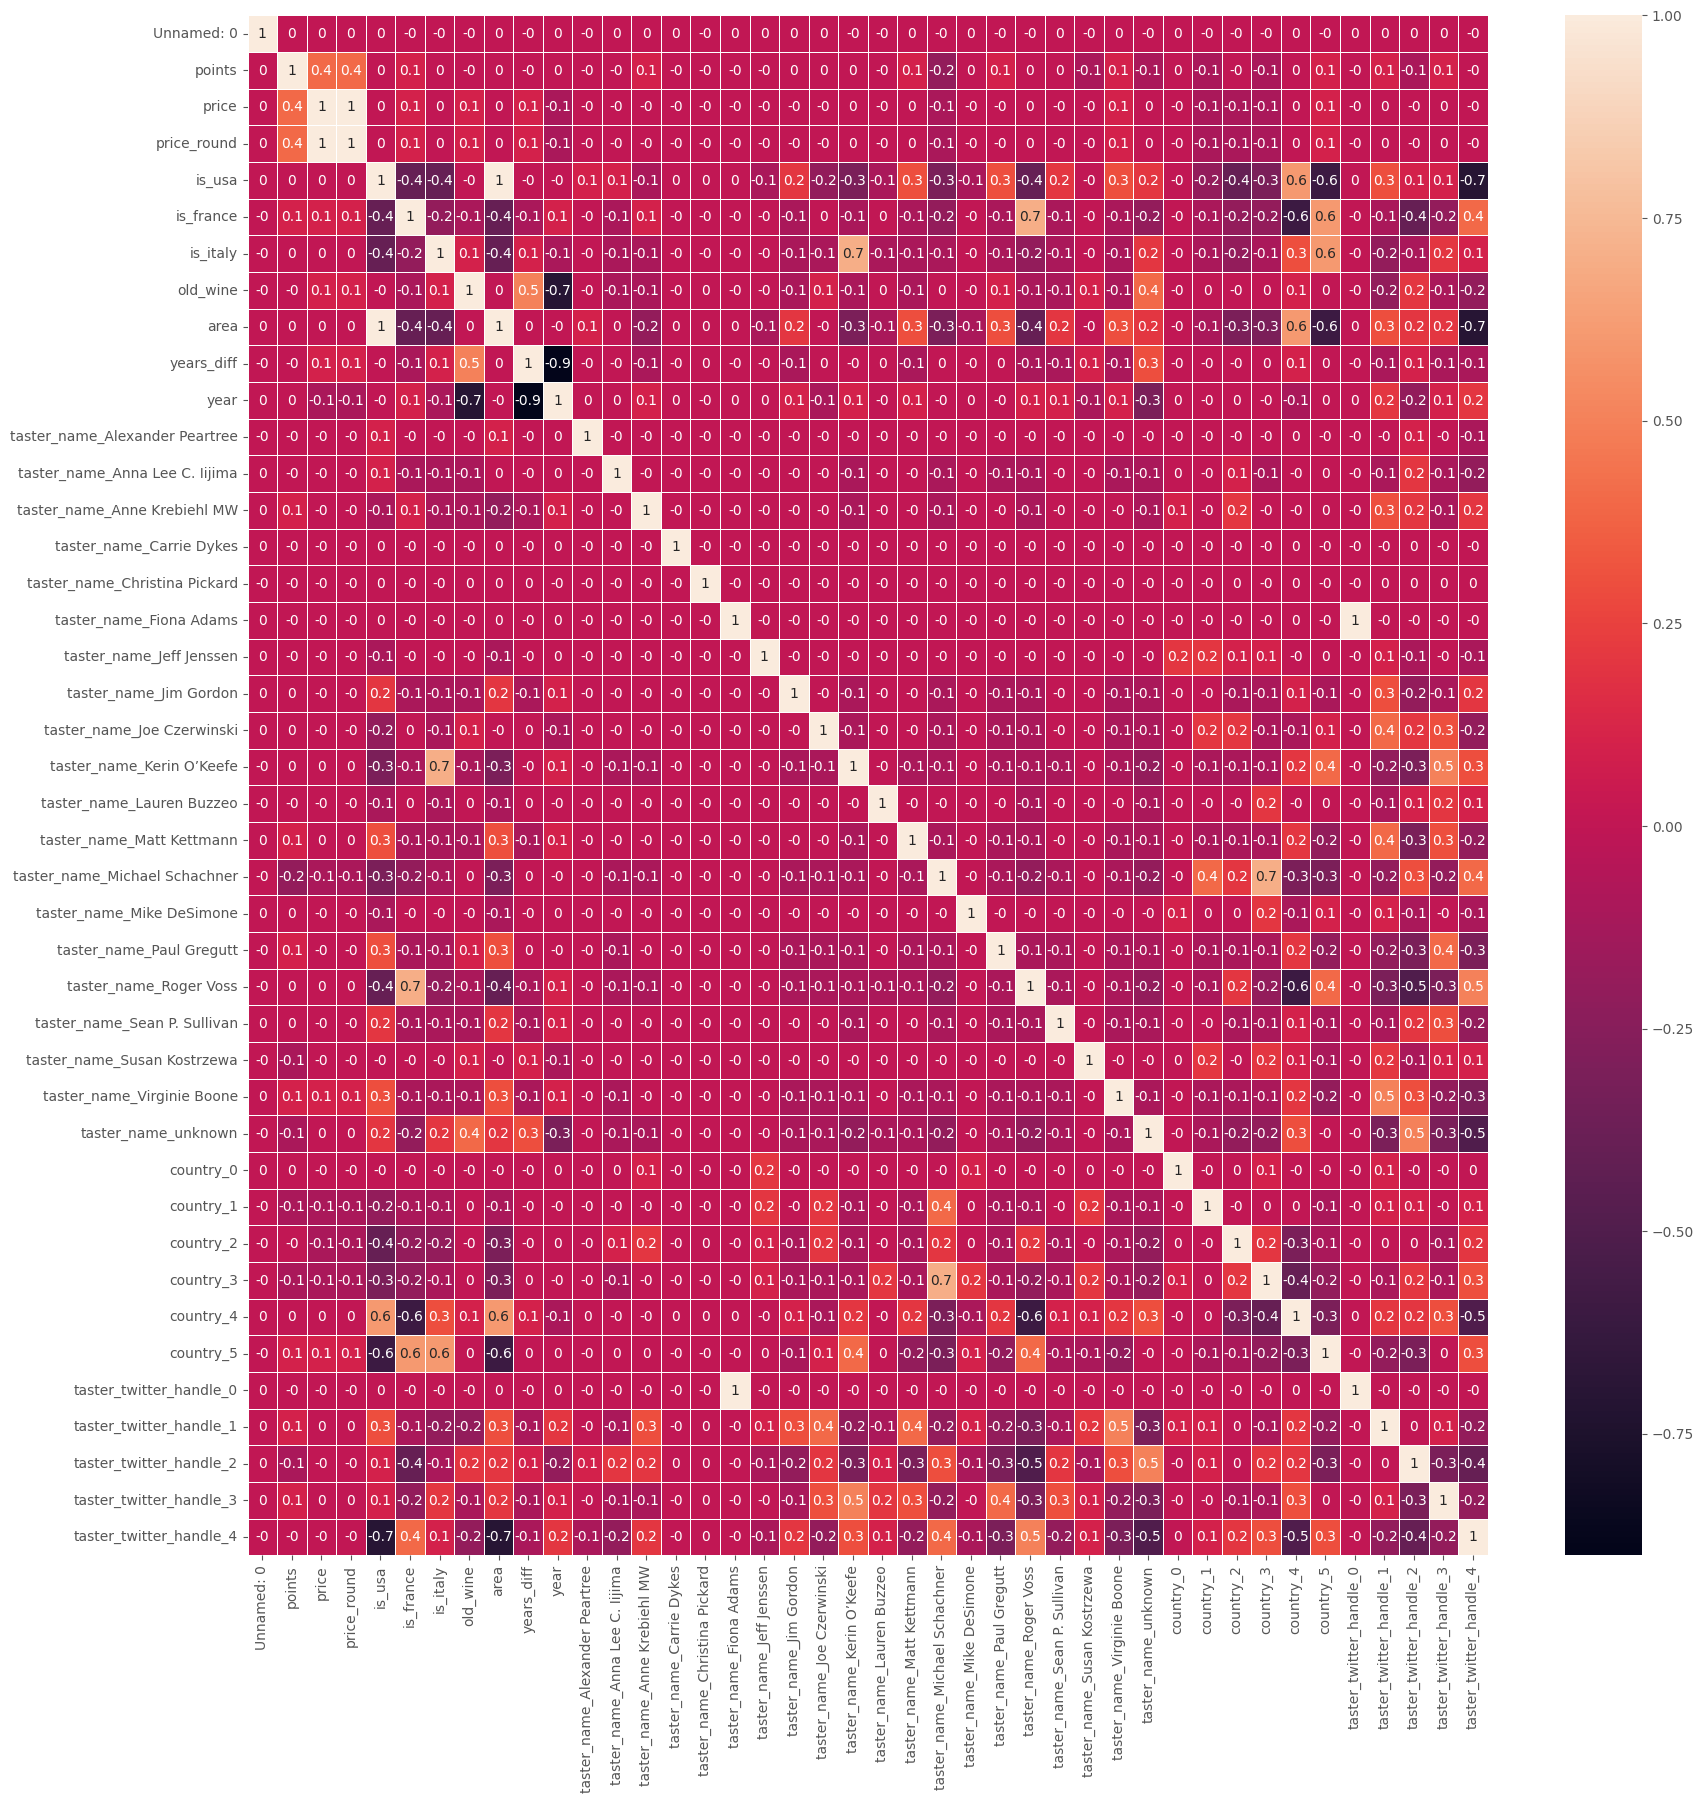

In [249]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(wine_df.corr(numeric_only=True).round(1), annot=True, linewidths=.5, ax=ax)


In [250]:
heart = pd.read_csv('data/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [251]:
# Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
# В ответ введите результат выполнения кода heart['old'].sum()
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

age — возраст
sex — пол (1 - мужчина, 0 - женщина)
cp — тип боли в груди (4 значения)
trestbps — артериальное давление в покое
chol — холестерин сыворотки в мг/дл
fbs — уровень сахара в крови натощак > 120 мг/дл
restecg — результаты электрокардиографии в покое (значения 0,1,2)
thalach — достигнута максимальная частота сердечных сокращений
exang — стенокардия, вызванная физической нагрузкой
oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
slope — наклон пикового сегмента ST при нагрузке
ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [252]:
heart[['sex', 'age']].iloc[1]

sex     1
age    37
Name: 1, dtype: int64

In [257]:
#оздайте новый признак trestbps_mean, который будет обозначать норму давления в среднем
# для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.
def pressure(row):
    pressure_men = {0: 123, 20: 126, 30: 129, 40: 135, 50: 142, 60: 142} 
    pressure_women = {0: 116, 20: 120, 30: 127, 40: 137, 50: 144, 60: 159}  
    if row['sex'] == 1:  
        for key in sorted(pressure_men.keys(), reverse=True):
            if key < row['age']:
                return pressure_men[key]
    else:
        for key in sorted(pressure_women.keys(), reverse=True):
            if key < row['age']:
                return pressure_women[key]

heart['trestbps_mean'] = heart[['sex', 'age']].apply(pressure, axis=1)



In [259]:
heart['trestbps_mean'].iloc[300]

142

In [261]:
heart.nunique()

age               41
sex                2
cp                 4
trestbps          49
chol             152
fbs                2
restecg            3
thalach           91
exang              2
oldpeak           40
slope              3
ca                 5
thal               4
target             2
old                2
trestbps_mean      8
dtype: int64